# Version

In [1]:
i = 1

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [3]:
# Preprocessing

scenario= "sinus" #sinus, helix
#n_instance = 1000
n_instance = 10000
n_features = 2
Z = 2 #3的倍數
nodes = 8 #4
var = 4
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

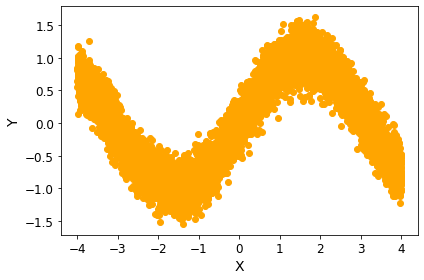

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [6]:
encoder=network.build_encoder(Z, nodes, n_features, use_bias)
decoder=network.build_decoder(Z, var, n_features, use_bias)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1000)         3000        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1000)         0           dense[0][0]                      
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 1000)         2000        dropout[0][0]                    
____________________________________________________________________________________________

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 100 #2000
batch_size = 1000

In [8]:
aae = AAE_Model.AAE(i, Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 1000)         3000        input_5[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1000)         0           dense_14[0][0]                   
__________________________________________________________________________________________________
layer_normalization_4 (LayerNor (None, 1000)         2000        dropout_1[0][0]                  
____________________________________________________________________________________________

In [9]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (1000, 2)
data shape_2 (1000, 2)
data shape_3 (1000, 2)
data shape_4 (1000, 2)
data shape_5 (1000, 2)
data shape_6 (1000, 2)
data shape_7 (1000, 2)
data shape_8 (1000, 2)
data shape_9 (1000, 2)
data shape_10 (1000, 2)
Cycles:  10
X_train (10000, 1)
y_train (10000, 1)
X_train_scaled (10000, 2)


### latent variable

## Training

1 [D real: -0.512695, D fake: 0.661839], [Enc/Dec loss: 0.325536, Enc/Dis: 0.332123]
2 [D real: -0.563517, D fake: 0.680026], [Enc/Dec loss: 0.209329, Enc/Dis: 0.214854]
3 [D real: -0.583879, D fake: 0.684939], [Enc/Dec loss: 0.203517, Enc/Dis: 0.208553]
4 [D real: -0.593687, D fake: 0.685072], [Enc/Dec loss: 0.202659, Enc/Dis: 0.207366]
5 [D real: -0.598871, D fake: 0.681584], [Enc/Dec loss: 0.200800, Enc/Dis: 0.205345]
6 [D real: -0.601692, D fake: 0.675709], [Enc/Dec loss: 0.200224, Enc/Dis: 0.204666]
7 [D real: -0.603353, D fake: 0.667363], [Enc/Dec loss: 0.200614, Enc/Dis: 0.205095]
8 [D real: -0.604011, D fake: 0.658641], [Enc/Dec loss: 0.199011, Enc/Dis: 0.203489]
9 [D real: -0.604638, D fake: 0.649838], [Enc/Dec loss: 0.197254, Enc/Dis: 0.201741]
10 [D real: -0.605019, D fake: 0.641684], [Enc/Dec loss: 0.196366, Enc/Dis: 0.200863]
11 [D real: -0.613967, D fake: 0.557015], [Enc/Dec loss: 0.196430, Enc/Dis: 0.200926]
12 [D real: -0.611776, D fake: 0.554623], [Enc/Dec loss: 0.1973

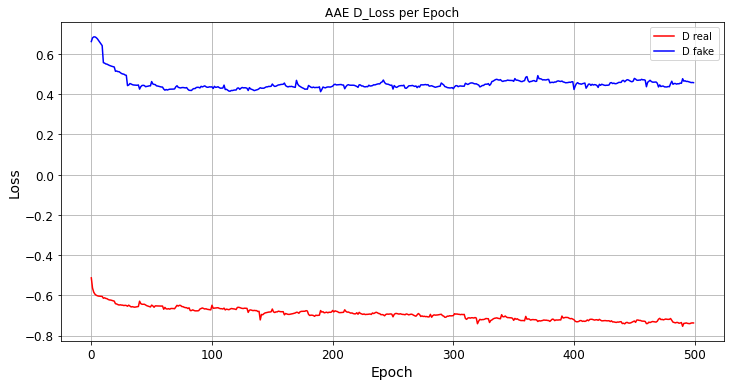

G_Loss: 


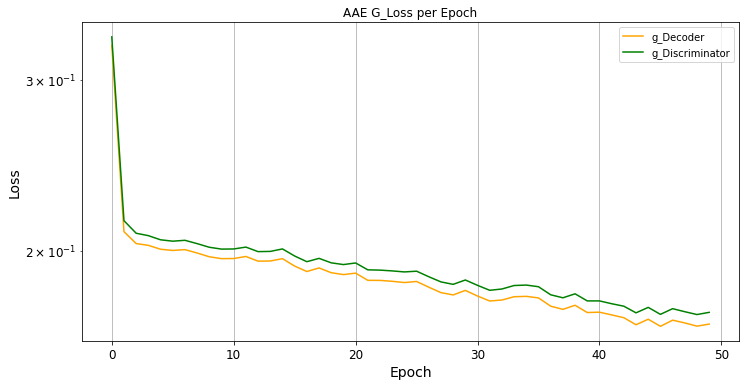

Z < 6


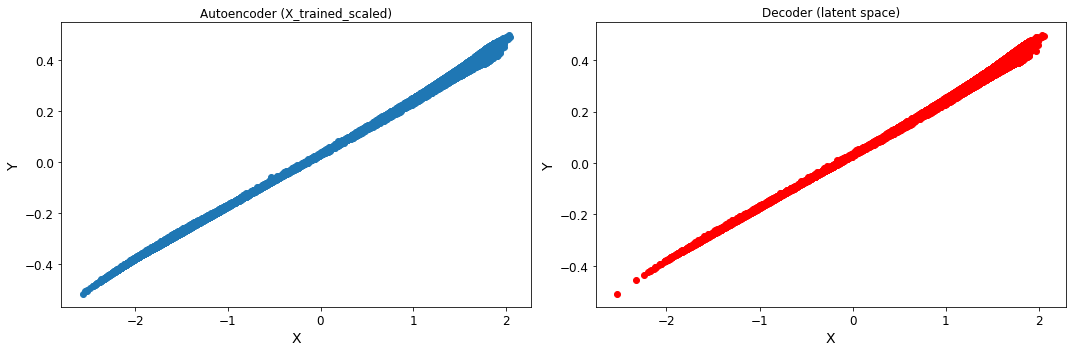

encoder output shape (10000, 2)


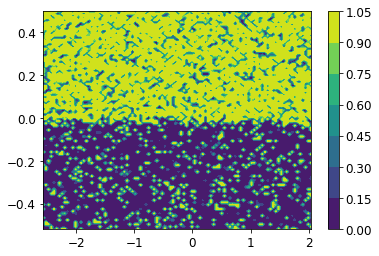

51 [D real: -0.648188, D fake: 0.463037], [Enc/Dec loss: 0.166012, Enc/Dis: 0.170804]
52 [D real: -0.652202, D fake: 0.450997], [Enc/Dec loss: 0.168169, Enc/Dis: 0.173024]
53 [D real: -0.658877, D fake: 0.448809], [Enc/Dec loss: 0.164081, Enc/Dis: 0.169033]
54 [D real: -0.651773, D fake: 0.447780], [Enc/Dec loss: 0.164132, Enc/Dis: 0.169084]
55 [D real: -0.651807, D fake: 0.441696], [Enc/Dec loss: 0.165969, Enc/Dis: 0.170766]
56 [D real: -0.652389, D fake: 0.440736], [Enc/Dec loss: 0.162194, Enc/Dis: 0.166982]
57 [D real: -0.652649, D fake: 0.439213], [Enc/Dec loss: 0.159877, Enc/Dis: 0.164762]
58 [D real: -0.652814, D fake: 0.438241], [Enc/Dec loss: 0.157604, Enc/Dis: 0.162480]
59 [D real: -0.652990, D fake: 0.435916], [Enc/Dec loss: 0.162487, Enc/Dis: 0.167454]
60 [D real: -0.652831, D fake: 0.435636], [Enc/Dec loss: 0.161349, Enc/Dis: 0.166336]
61 [D real: -0.668587, D fake: 0.425565], [Enc/Dec loss: 0.159074, Enc/Dis: 0.164052]
62 [D real: -0.659486, D fake: 0.420160], [Enc/Dec los

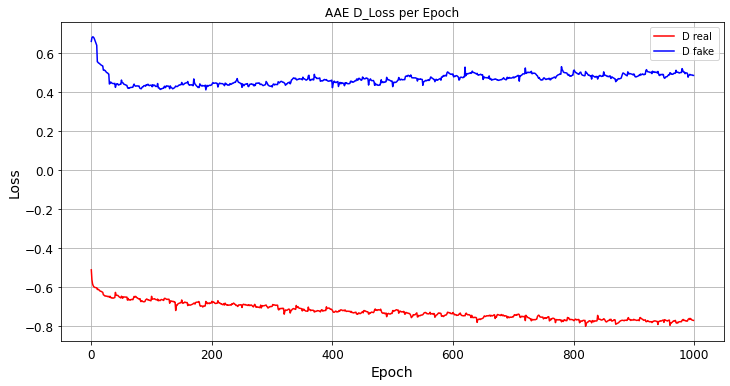

G_Loss: 


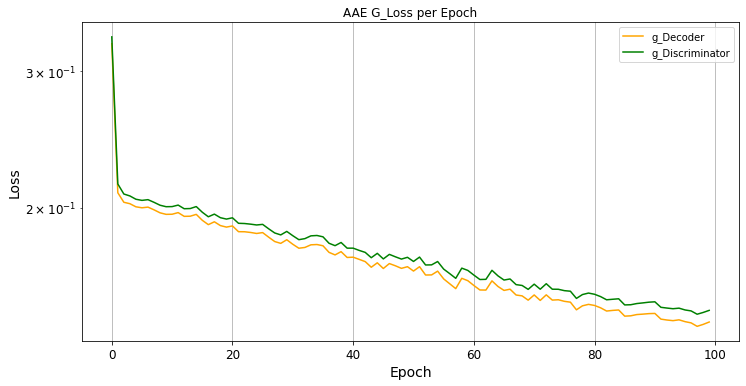

Z < 6


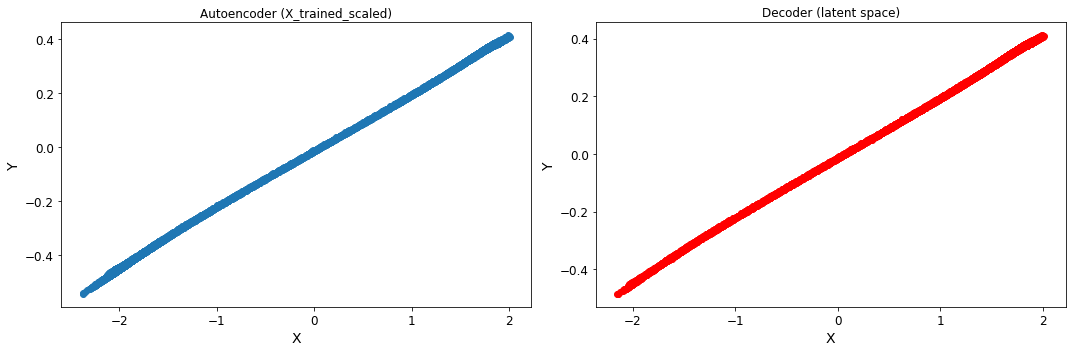

encoder output shape (10000, 2)


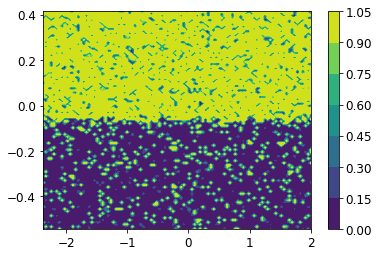

In [10]:
hist = aae.train(i, Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


### Plot Loss

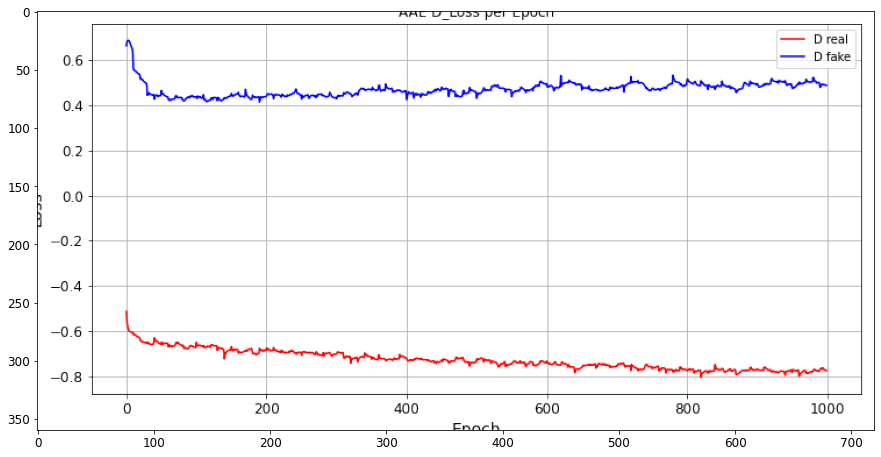

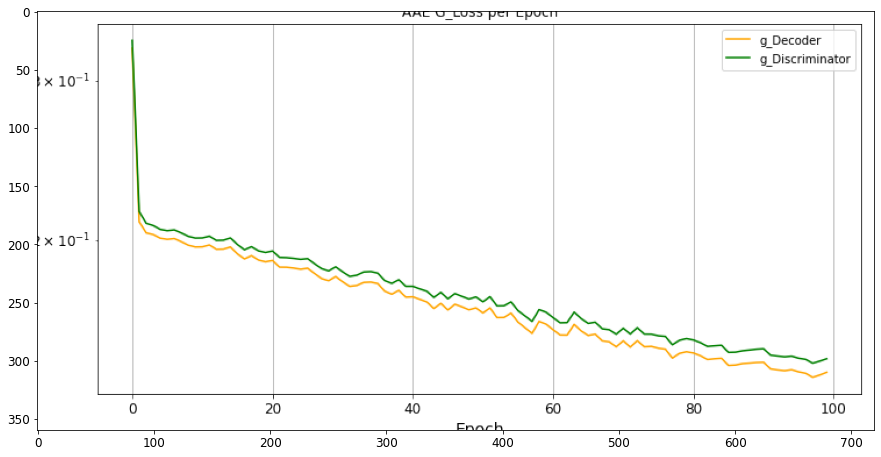

In [11]:
from PIL import Image

#Discriminator Loss
Dloss = Image.open('AAE/Losses/D_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("D_loss",figsize=[15,10])
plt.imshow(Dloss)
#Encoder Loss
Gloss = Image.open('AAE/Losses/G_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("G_loss",figsize=[15,10])
plt.imshow(Gloss)


## predict from the decoder

In [12]:
epochs = epochs

In [13]:
img = Image.open('AAE/Result/v'+str(i)+'_latent_space 3D_'+str(epochs)+'.png')
plt.figure("3D",figsize=[15,10])
plt.imshow(img)

img2 = Image.open('AAE/Result/v'+str(i)+'_Latent_Space 2D_'+str(epochs)+'.png')
plt.figure("2D",figsize=[15,10])
plt.imshow(img2)

img3 = Image.open('AAE/Result/v_'+str(i)+'_epochs_'+str(epochs)+'.png')
plt.figure("Autoencoder",figsize=[15,10])
plt.imshow(img3)

img4 = Image.open('AAE/Result/'+'countour_line_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("countour_line",figsize=[15,10])
plt.imshow(img4)


FileNotFoundError: [Errno 2] No such file or directory: 'AAE/Result/v1_latent_space 3D_100.png'

### Applying the prediction function

In [ ]:
i = i

In [ ]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset, network

In [ ]:
epochs = epochs

In [ ]:
encoder = keras.models.load_model('./AAE/Models/encoder_v'+str(i)+'_'+str(epochs))
decoder = keras.models.load_model('./AAE/Models/decoder_v'+str(i)+'_'+str(epochs))
discriminator = keras.models.load_model('./AAE/Models/discriminator_v'+str(i)+'_'+str(epochs))


In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

In [ ]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    